## Run OpenCV Image Stitching API in OneAPI Devcloud

#### Install OpenCV

In [4]:
# Download
!wget -O opencv.zip https://github.com/opencv/opencv/archive/master.zip
!wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/master.zip

--2021-02-21 09:48:07--  https://github.com/opencv/opencv/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/opencv/opencv/zip/master [following]
--2021-02-21 09:48:08--  https://codeload.github.com/opencv/opencv/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92904970 (89M) [application/zip]
Saving to: ‘opencv.zip’

opencv.zip          100%[===================>]  88.60M  6.82MB/s    in 17s     

2021-02-21 09:48:25 (5.23 MB/s) - ‘opencv.zip’ saved [92904970/92904970]

--2021-02-21 09:48:26--  https://github.com/opencv/opencv_contrib/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|1

In [5]:
# Extract the zips
!unzip -q opencv.zip
!unzip -q opencv_contrib.zip

In [6]:
# Create build directory
!mkdir -p build

In [2]:
%cd ~/build

/home/u59912/build


In [13]:
# Build using cmake
!cmake -DCMAKE_INSTALL_PREFIX=/home/u59912/opencv-bin -DOPENCV_GENERATE_PKGCONFIG=ON -DWITH_TBB=ON -DWITH_V4L=ON -DWITH_OPENGL=ON -DOPENCV_EXTRA_MODULES_PATH=../opencv_contrib-master/modules ../opencv-master

-- The CXX compiler identification is GNU 7.4.0
-- The C compiler identification is GNU 7.4.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Detected processor: x86_64
-- Found PythonInterp: /usr/bin/python2.7 (found suitable version "2.7.17", minimum required is "2.7") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython2.7.so (found suitable exact version "2.7.17") 
Traceback (most recent call last):
  File "<string>", line 1, in <module>
ImportError: No module named numpy.distutils
-- Found PythonInterp: /opt/intel/inteloneapi/int

In [14]:
# make using the juicy 24 core CPU :D
!make -j24

Scanning dependencies of target ade
Scanning dependencies of target opencv_videoio_plugins
Scanning dependencies of target libopenjp2
Scanning dependencies of target libtiff
Scanning dependencies of target gen-pkgconfig
Scanning dependencies of target IlmImf
Scanning dependencies of target ippiw
Scanning dependencies of target libpng
Scanning dependencies of target quirc
Scanning dependencies of target libprotobuf
Scanning dependencies of target ittnotify
Scanning dependencies of target libjpeg-turbo
Scanning dependencies of target libwebp
[  0%] Built target opencv_videoio_plugins
[  0%] Generate opencv4.pc
[  0%] Building C object 3rdparty/quirc/CMakeFiles/quirc.dir/src/quirc.c.o
[  0%] Building C object 3rdparty/quirc/CMakeFiles/quirc.dir/src/version_db.c.o
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/jitprofiling.c.o
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/ittnotify_static.c.o
[  0%] Building C object 

In [2]:
%cd build

/home/u59912/build


In [3]:
# Install opencv @ ~/opencv-bin
!make install

[  0%] Built target gen-pkgconfig
[  2%] Built target libjpeg-turbo
[  4%] Built target libtiff
[  9%] Built target libwebp
[ 10%] Built target libopenjp2
[ 11%] Built target libpng
[ 15%] Built target IlmImf
[ 17%] Built target ippiw
[ 20%] Built target libprotobuf
[ 21%] Built target quirc
[ 21%] Built target ittnotify
[ 22%] Built target ade
[ 22%] Built target opencv_videoio_plugins
[ 27%] Built target opencv_core
[ 31%] Built target opencv_imgproc
[ 32%] Built target opencv_imgcodecs
[ 32%] Built target opencv_videoio
[ 32%] Built target opencv_highgui
[ 33%] Built target opencv_ts
[ 35%] Built target opencv_test_core
[ 36%] Built target opencv_perf_core
[ 37%] Built target opencv_flann
[ 37%] Built target opencv_test_flann
[ 39%] Built target opencv_perf_imgproc
[ 42%] Built target opencv_test_imgproc
[ 42%] Built target opencv_intensity_transform
[ 42%] Built target opencv_test_intensity_transform
[ 43%] Built target opencv_ml
[ 44%] Built target opencv_test_ml
[ 44%] Built targ

#### Setup Paths for OpenCV

In [42]:
import os

In [43]:
# Set path for pkg-config
os.environ['PKG_CONFIG_PATH'] += os.pathsep + '/home/u59912/opencv-bin/lib/pkgconfig'

In [44]:
# Check OpenCV version
!pkg-config --modversion opencv4

4.5.1


In [45]:
# Check PKG_CONFIG_PATH
!echo $PKG_CONFIG_PATH

/glob/development-tools/versions/oneapi/gold/inteloneapi/inspector/2021.1.1/include/pkgconfig/lib64:/glob/development-tools/versions/oneapi/gold/inteloneapi/vtune/2021.1.1/include/pkgconfig/lib64:/glob/development-tools/versions/oneapi/gold/inteloneapi/advisor/2021.1.1/include/pkgconfig/lib64:/glob/development-tools/versions/oneapi/gold/inteloneapi/mkl/latest/tools/pkgconfig:/glob/development-tools/versions/oneapi/gold/inteloneapi/inspector/2021.1.1/include/pkgconfig/lib64:/glob/development-tools/versions/oneapi/gold/inteloneapi/vtune/2021.1.1/include/pkgconfig/lib64:/glob/development-tools/versions/oneapi/gold/inteloneapi/advisor/2021.1.1/include/pkgconfig/lib64:/glob/development-tools/versions/oneapi/gold/inteloneapi/mkl/latest/tools/pkgconfig:/home/u59912/opencv-bin/lib/pkgconfig:/home/u59912/opencv-bin/lib/pkgconfig


In [46]:
# Set OpenCV library path
os.environ['LD_LIBRARY_PATH'] += os.pathsep + '/home/u59912/opencv-bin/lib'

In [47]:
# Check LD_LIBRARY_PATH
!echo $LD_LIBRARY_PATH

/opt/intel/inteloneapi/intelfpgadpcpp/latest/board/intel_a10gx_pac/linux64/lib:/glob/development-tools/versions/oneapi/gold/inteloneapi/itac/2021.1.1/slib:/glob/development-tools/versions/oneapi/gold/inteloneapi/ipp/2021.1.1/lib/intel64:/glob/development-tools/versions/oneapi/gold/inteloneapi/ccl/2021.1.1/lib/cpu_gpu_dpcpp:/glob/development-tools/versions/oneapi/gold/inteloneapi/rkcommon/1.5.0/lib:/glob/development-tools/versions/oneapi/gold/inteloneapi/vpl/2021.1.1/lib:/glob/development-tools/versions/oneapi/gold/inteloneapi/dal/2021.1.1/lib/intel64:/glob/development-tools/versions/oneapi/gold/inteloneapi/openvkl/0.11.0/lib:/glob/development-tools/versions/oneapi/gold/inteloneapi/tbb/2021.1.1/env/../lib/intel64/gcc4.8:/glob/development-tools/versions/oneapi/gold/inteloneapi/compiler/2021.1.2/linux/lib:/glob/development-tools/versions/oneapi/gold/inteloneapi/compiler/2021.1.2/linux/lib/x64:/glob/development-tools/versions/oneapi/gold/inteloneapi/compiler/2021.1.2/linux/lib/emu:/glob/de

#### Compile the program

In [48]:
# Go inside demo directory
%cd ~/image-stitch-oneapi/

/home/u59912/image-stitch-oneapi


In [49]:
# Compile using DPC++ (Data Parallel C++ by Intel)
!dpcpp stitch.cpp -o stitch `pkg-config --cflags --libs opencv4`

In [50]:
!ls

1.png  3.png  5.png				result.jpg  stitch.cpp
2.png  4.png  opencv-image-stitch-oneapi.ipynb	stitch


#### Run the program

In [51]:
# Run the program
!./stitch

Images stitcher.

Usage :
./stitch [Flags] img1 img2 [...imgN]

Flags:
  --d3
      internally creates three chunks of each image to increase stitching success
  --mode (panorama|scans)
      Determines configuration of stitcher. The default is 'panorama',
      mode suitable for creating photo panoramas. Option 'scans' is suitable
      for stitching materials under affine transformation, such as scans.
  --output <result_img>
      The default is 'result.jpg'.

Example usage :
./stitch --d3 --mode scans img1.jpg img2.jpg


In [37]:
import subprocess

In [38]:
runstring = './stitch --d3 --mode scans 1.png 2.png 3.png 4.png 5.png'

In [39]:
# Run the command using subprocess
subprocess.run(runstring.split(" "))

CompletedProcess(args=['./stitch', '--d3', '--mode', 'scans', '1.png', '2.png', '3.png', '4.png', '5.png'], returncode=0)

#### View the test images

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

We are using several images of San Fransisco Bay taken from Google Earth as Image Stitching Demo

Text(0.5, 1.0, 'Stitching result')

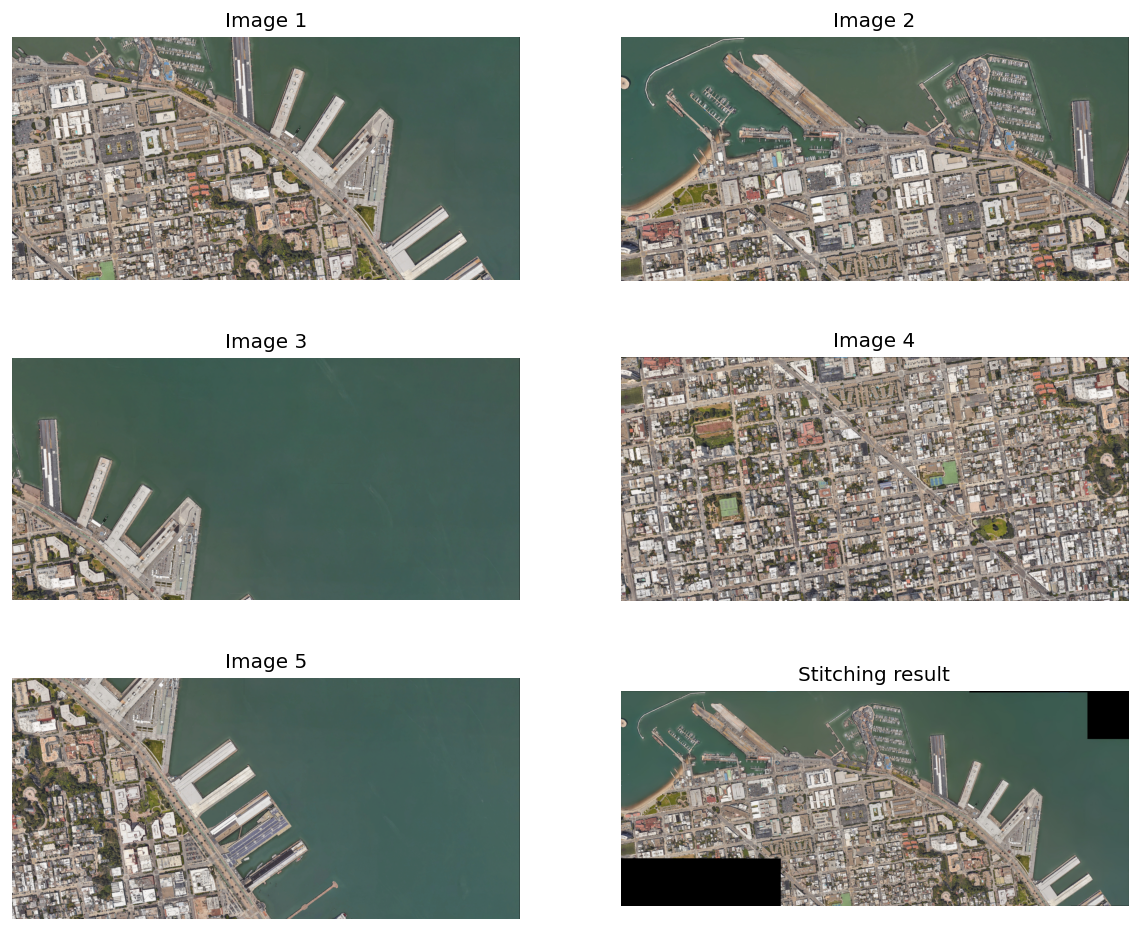

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), dpi=120)

axs[0, 0].imshow(mpimg.imread('1.png'))
axs[0, 0].axis('off')
axs[0, 0].set_title('Image 1')

axs[0, 1].imshow(mpimg.imread('2.png'))
axs[0, 1].axis('off')
axs[0, 1].set_title('Image 2')

axs[1, 0].imshow(mpimg.imread('3.png'))
axs[1, 0].axis('off')
axs[1, 0].set_title('Image 3')

axs[1, 1].imshow(mpimg.imread('4.png'))
axs[1, 1].axis('off')
axs[1, 1].set_title('Image 4')

axs[2, 0].imshow(mpimg.imread('5.png'))
axs[2, 0].axis('off')
axs[2, 0].set_title('Image 5')

axs[2, 1].imshow(mpimg.imread('result.jpg'))
axs[2, 1].axis('off')
axs[2, 1].set_title('Stitching result')